# Pandas DataFrames

## Pandas Series

Sebelum kita masuk ke DataFrames, kita akan mempelajari Pandas Series. Series sangat mirip dengan ndarrays: perbedaan utama di antara keduanya adalah bahwa dengan Series, Anda dapat memberikan label indeks khusus dan kemudian operasi yang Anda lakukan pada Series secara otomatis menyelaraskan data berdasarkan label.

Struktur data utama di *pandas* diimplementasikan sebagai dua kelas:

   * **`DataFrame`**, yang dapat Anda bayangkan sebagai tabel data relasional, dengan baris dan kolom bernama.
   * **`Series`**, yang merupakan satu kolom. `DataFrame` berisi satu atau lebih `Series` dan nama untuk setiap `Series`.

   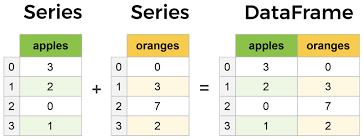

In [3]:
import numpy as np
import pandas as pd    

*Catatan: Import Pandas dengan singkatan "pd" merupakan praktik yang umum dilakukan.*

Tentukan seri baru dengan meneruskan kumpulan data homogen seperti ndarray atau daftar, bersama dengan daftar indeks terkait ke pd.Series():

In [4]:
my_series = pd.Series( data = [2,3,5,4],             # Data
                       index= ['a', 'b', 'c', 'd'])  # Indexes

my_series

a    2
b    3
c    5
d    4
dtype: int64

Anda juga dapat membuat rangkaian dari dictionary, dalam hal ini kunci kamus bertindak sebagai label dan nilai bertindak sebagai data:

In [5]:
my_dict = {"x": 2, "a": 5, "b": 4, "c": 8}

my_series2 = pd.Series(my_dict)

my_series2

x    2
a    5
b    4
c    8
dtype: int64

Mirip dengan dictionary, Anda dapat mengakses item dalam rangkaian dengan label:

In [6]:
my_series["a"]

2

Pengindeksan numerik juga berfungsi:

In [7]:
my_series[0]

2

Jika Anda mengambil sepotong rangkaian, Anda mendapatkan nilai dan label yang terkandung dalam irisan:

In [8]:
my_series[1:3]

b    3
c    5
dtype: int64

Seperti disebutkan sebelumnya, operasi yang dilakukan pada dua Series sejajar dengan label:

In [9]:
my_series + my_series

a     4
b     6
c    10
d     8
dtype: int64

Jika Anda melakukan operasi dengan dua Series yang memiliki label berbeda, label yang tidak cocok akan mengembalikan nilai NaN (bukan angka).

In [10]:
my_series + my_series2

a     7.0
b     7.0
c    13.0
d     NaN
x     NaN
dtype: float64

Selain pelabelan, rangkaian berperilaku seperti ndarray numpy. Serangkaian bahkan merupakan argumen yang valid untuk banyak fungsi array numpy yang kami bahas terakhir kali:

In [11]:
np.mean(my_series)        # numpy array functions generally work on series

3.5

In [12]:
pd.concat([my_series, my_series2], axis=1)

,0,1
a,2.0,5.0
b,3.0,4.0
c,5.0,8.0
d,4.0,NaN
x,NaN,2.0


In [13]:
df = pd.DataFrame(columns = ['Column_name#1', 'Column_name#2'])

df['Column_name#1'] = my_series
df['Column_name#2'] = my_series2

In [14]:
df.head()

,Column_name#1,Column_name#2
a,2,5.0
b,3,4.0
c,5,8.0
d,4,NaN


## DataFrame Creation and Indexing

DataFrame adalah tabel 2D dengan kolom berlabel yang masing-masing dapat menampung berbagai jenis data. DataFrames pada dasarnya adalah implementasi Python dari jenis tabel yang Anda lihat di buku kerja Excel atau database SQL.

In [15]:
import numpy as np
import pandas as pd
my_dict2 = {"name" : ["Joe","Bob","Frans"],
           "age" : np.array([10,15,20]),
           "weight" : (75,123,239),
           "height" :[4.5, 5, 6.1],
           "siblings" : 1,
           "gender" : "M"}

df2 = pd.DataFrame(my_dict2)   # Convert the dict to DataFrame

df2                            # Show the DataFrame

,name,age,weight,height,siblings,gender
0,Joe,10,75,4.5,1,M
1,Bob,15,123,5.0,1,M
2,Frans,20,239,6.1,1,M


Anda dapat memberikan label baris khusus saat membuat DataFrame dengan menambahkan argumen indeks:

In [16]:
df2 = pd.DataFrame(my_dict2,
                   index = my_dict2["name"] )

df2

,name,age,weight,height,siblings,gender
Joe,Joe,10,75,4.5,1,M
Bob,Bob,15,123,5.0,1,M
Frans,Frans,20,239,6.1,1,M


DataFrame berperilaku seperti kamus objek Series yang masing-masing memiliki panjang dan indeks yang sama. Ini berarti kita bisa mendapatkan, menambah, dan menghapus kolom dalam DataFrame dengan cara yang sama seperti saat kita berurusan dengan kamus:

In [17]:
# Get a column by name

df2["weight"]

Joe       75
Bob      123
Frans    239
Name: weight, dtype: int64

Atau, Anda bisa mendapatkan kolom dengan label menggunakan notasi "titik":

In [18]:
df2.weight

Joe       75
Bob      123
Frans    239
Name: weight, dtype: int64

In [19]:
# Delete a column

del df2['name']

In [20]:
# Add a new column

df2["IQ"] = [130, 105, 115]

df2

,age,weight,height,siblings,gender,IQ
Joe,10,75,4.5,1,M,130
Bob,15,123,5.0,1,M,105
Frans,20,239,6.1,1,M,115


Memasukkan satu nilai ke dalam DataFrame menyebabkannya terisi di semua baris:

In [21]:
df2["Married"] = False

df2

,age,weight,height,siblings,gender,IQ,Married
Joe,10,75,4.5,1,M,130,False
Bob,15,123,5.0,1,M,105,False
Frans,20,239,6.1,1,M,115,False


Saat memasukkan Seri ke dalam DataFrame, baris dicocokkan dengan indeks. Baris yang tidak cocok akan diisi dengan NaN:

In [22]:

df2["College"] = pd.Series(["Harvard"],
                           index=["Frans"])

df2

,age,weight,height,siblings,gender,IQ,Married,College
Joe,10,75,4.5,1,M,130,False,NaN
Bob,15,123,5.0,1,M,105,False,NaN
Frans,20,239,6.1,1,M,115,False,Harvard


Anda dapat memilih baris atau kolom dengan label dengan df.loc[row, column]:

In [23]:
df2.loc["Joe"]          # Select row "Joe"

age            10
weight         75
height        4.5
siblings        1
gender          M
IQ            130
Married     False
College       NaN
Name: Joe, dtype: object

In [24]:
df2.loc["Joe","IQ"]     # Select row "Joe" and column "IQ"

130

In [25]:
df2.loc["Joe":"Bob" , "IQ":"College"]   # Slice by label

,IQ,Married,College
Joe,130,False,NaN
Bob,105,False,NaN


Select rows or columns by numeric index with df.iloc[row, column]:

In [26]:
df2.iloc[0]          # Get row 0

age            10
weight         75
height        4.5
siblings        1
gender          M
IQ            130
Married     False
College       NaN
Name: Joe, dtype: object

In [27]:
df2.iloc[0, 5]       # Get row 0, column 5

130

In [28]:
df2.iloc[0:2, 5:8]   # Slice by numeric row and column index

,IQ,Married,College
Joe,130,False,NaN
Bob,105,False,NaN


Anda juga dapat memilih baris dengan meneruskan nilai boolean(Benar/Salah) urutan. Baris di mana boolean yang sesuai adalah True dikembalikan:

In [29]:
boolean_index = [False, True, True]  

df2[boolean_index] 

,age,weight,height,siblings,gender,IQ,Married,College
Bob,15,123,5.0,1,M,105,False,NaN
Frans,20,239,6.1,1,M,115,False,Harvard


Jenis pengindeksan True/False logis ini berguna untuk mensubset data saat digabungkan dengan operasi logis. Misalnya, kami ingin mendapatkan subset DataFrame kami dengan semua orang yang berusia di atas 12 tahun. Kita bisa melakukannya dengan pengindeksan boolean:

In [30]:
# Create a boolean sequence with a logical comparison
boolean_index = df2["age"] > 12

# Use the index to get the rows where age > 12
df2[boolean_index]

,age,weight,height,siblings,gender,IQ,Married,College
Bob,15,123,5.0,1,M,105,False,NaN
Frans,20,239,6.1,1,M,115,False,Harvard


Anda dapat melakukan pengindeksan semacam ini dalam satu operasi tanpa menetapkan urutan boolean ke variabel:

In [31]:
df2[ df2["age"] > 12 ]

,age,weight,height,siblings,gender,IQ,Married,College
Bob,15,123,5.0,1,M,105,False,NaN
Frans,20,239,6.1,1,M,115,False,Harvard


## Aggregation and Select Rows Based on Max and Min

Mencari nilai rata-rata column 

In [32]:
df2.age.mean()

15.0

Mencari nilai max pada column

In [ ]:
df2.age.max()

20

Filter rows berdasarkan nilai max column

In [ ]:
df2[df2['age']== df2.age.max()]

,age,weight,height,siblings,gender,IQ,Married,College,name
Frans,20,239,6.1,1,M,115,False,Harvard,Frans


Filter rows berdasarkan nilai min column

In [ ]:
df2[df2['age']== df2.age.min()]

,age,weight,height,siblings,gender,IQ,Married,College,name
Joe,10,75,4.5,1,M,130,False,NaN,Joe
